<h1><center>Laborator 1</center></h1>

### Importuri necesare

In [147]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Citire si afisare imagine color

In [64]:
img = cv.imread("butterfly.jpeg")
cv.imshow("Fluture galben",img)
cv.waitKey(0)
cv.destroyAllWindows() #trebuie asteptata imaginea si dupa inchisa, altfel se blocheaza

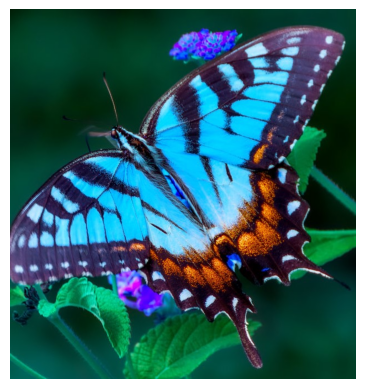

In [68]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # conversie de culori
plt.imshow(img)
plt.axis('off')
plt.show()#fluturele e albastru in loc de galben ( OpenCv nu citeste RGB si BGR ), OpenCv stie sa faca conversia, dar plt nu stie asta

### Citire si afisare imagine gray

In [70]:
img = cv.imread("butterfly.jpeg",cv.IMREAD_GRAYSCALE)
cv.imshow("Fluture gray",img)
cv.waitKey(0)
cv.destroyAllWindows()

### Dimensiune imagine

In [54]:
H, W = img.shape
print(H,W)

670 626


### Redimensionare imagine

In [74]:
img = cv.resize(img,(100, 100))
H, W = img.shape
print(H,W)
cv.imshow("Fluture gray redimensionat",img)
cv.waitKey(0)
cv.destroyAllWindows()

100 100


In [133]:
img2 = cv.resize(cv.cvtColor(cv.imread('football.jpg'), cv.COLOR_BGR2RGB), (100,100))

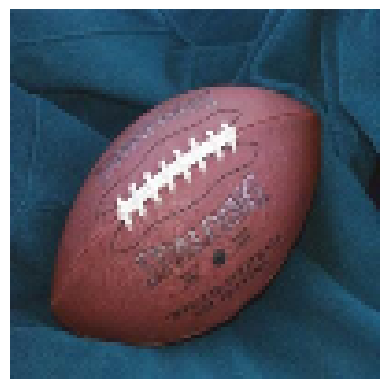

In [135]:
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.show()

[  9  10  10 ... 255 255 255]


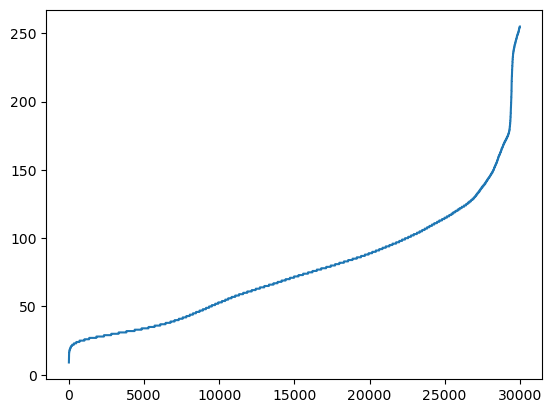

In [139]:
#a
v = img2.flatten()
x = np.sort(v)
print(x)
plt.plot(np.arange(len(x)), x)
plt.show()

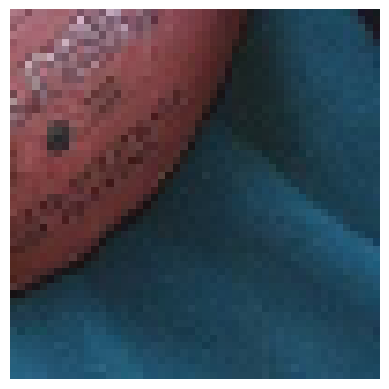

In [141]:
#b
A = img[50:, 50:].copy()

plt.imshow(A, cmap='gray')
plt.axis('off')
plt.show()

In [149]:
#c
t = np.median(x)
print(t)

72.0


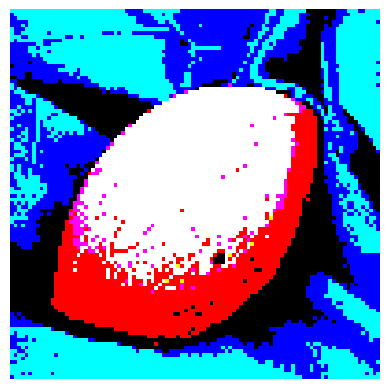

In [153]:
#d
B = img2.copy()
B[B < t] = 0
B[B >= t] = 255

plt.imshow(B, cmap='gray')
plt.axis('off')
plt.show()

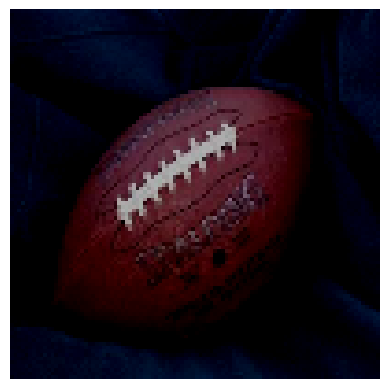

In [173]:
#e
i_mediu = img.mean()
C = img2 - i_mediu
C[C < 0] = 0
C = np.uint8(C)

plt.imshow(C, cmap='gray')
plt.axis('off')
plt.show()

In [186]:
#f
i_min = img.min()
print(i_min)
lin, col = np.where(img == i_min)
print(l,c)

9


ValueError: too many values to unpack (expected 2)

In [195]:
#1.7
import os

(57, 215, 300, 3)
(57, 215, 300)


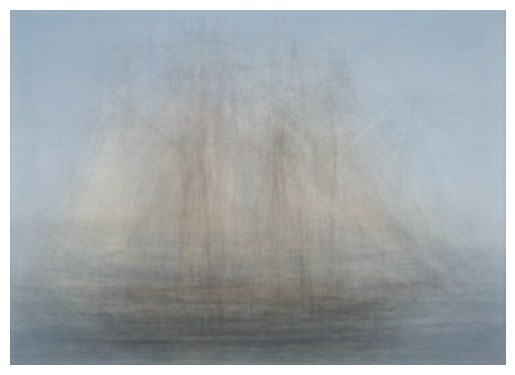

In [256]:
dir_paths = 'colectiiImagini/set1/'
files = sorted(os.listdir(dir_paths))
color_images = []
gray_images = []
for image_name in files:
    if image_name.endswith('jpg'):
        path = dir_paths+image_name
        img = cv.imread(path)
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        color_images.append(img)
        gray_images.append(img_gray)
color_images = np.array(color_images)
print(color_images.shape)
gray_images = np.array(gray_images)
print(gray_images.shape)
mean_color_image = np.uint8(np.mean(color_images, axis=0))
mean_color_image = cv.cvtColor(mean_color_image, cv.COLOR_BGR2RGB)
plt.imshow(mean_color_image)
plt.axis('off')
plt.show()

TypeError: Image data of dtype object cannot be converted to float

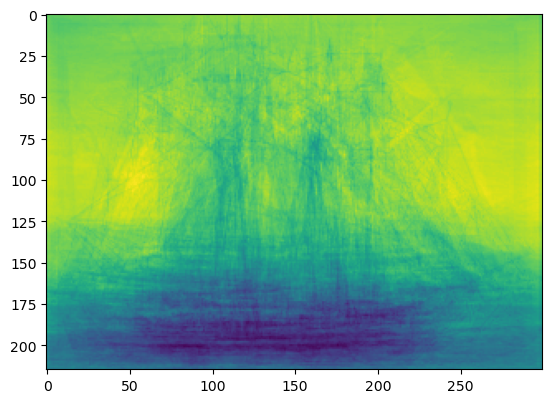

In [268]:
mean_gray_image = np.uint8(np.mean(gray_images, axis=0))
mean_gray_image = plt.imshow(mean_gray_image)
plt.imshow(mean_gray_image, cmap='gray')
plt.axis('off')
plt.show()

2782.352961074493
2782.352961074493


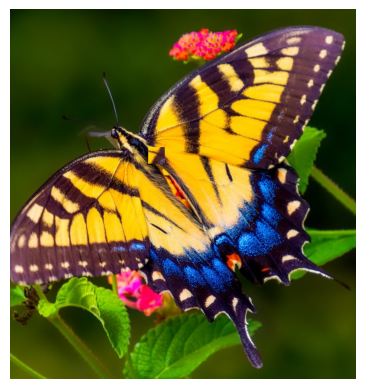

In [301]:
img = cv.imread('butterfly.jpeg')
ws = 30 # ferestre de dim 20 pe 20
img_crop = img[250:250+ws, 250:250+ws, :].copy()
H, W, _ = img.shape
nw = 500 # number of windows
y = np.random.randint(0, H - ws, size = (nw))
x = np.random.randint(0, W - ws, size = (nw))
dist = np.zeros(nw)
for i in range(nw):
    patch = img[y[i]:y[i]+ws, x[i]:x[i]+ws].copy()
    dist[i] = np.sqrt(np.sum((np.float64(patch) - np.float64(img_crop))**2))
index = np.argmin(dist)
print(dist.min())
print(dist[index])
img_new = img.copy()
img_new[250:250+ws, 250:250+ws, :] = img[y[i]:y[i]+ws, x[i]:x[i]+ws]
img_new = cv.cvtColor(img_new, cv.COLOR_BGR2RGB)

plt.imshow(img_new)
plt.axis('off')
plt.show()